In [469]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [513]:
np.array(sorted(list(range(n))))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [580]:
np.random.seed(50)
n = 40

X = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=.5)
y = np.array(sorted(list(range(10))*4)) + np.random.normal(size=n, scale=2.25)

# generate prices to be roughly $600 per square-foot
# sqft = [220, 500, 550, 600, 750, 800, 900, 920, 1385, 1200, 1400, 1500, 1550, 1800, 2000]
# prices = [np.round(i * np.random.normal(600, 200), 0)**(1/2) for i in sqft]
sqft = X + 1
prices = y + 2
df = pd.DataFrame({'sqft': sqft, 'price': prices})
df.head()

,sqft,price
0,0.219824,1.549063
1,0.984511,3.671836
2,0.689536,3.929064
3,0.267710,-1.388926
4,2.705973,-0.749292


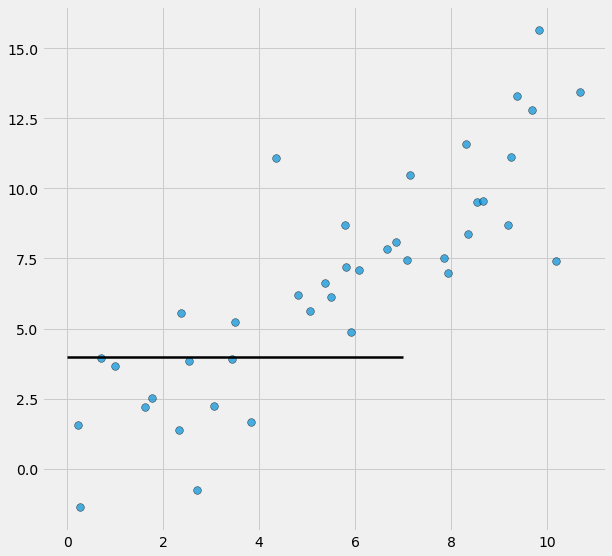

In [581]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
a_flat = 4
b_flat = 0

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 7, num=1000)

# Plot regression line
ax.plot(xseq, a_flat + b_flat * xseq, color="k", lw=2.5);

intercept:  0.5444166165823855
slope:  1.1049975422309999


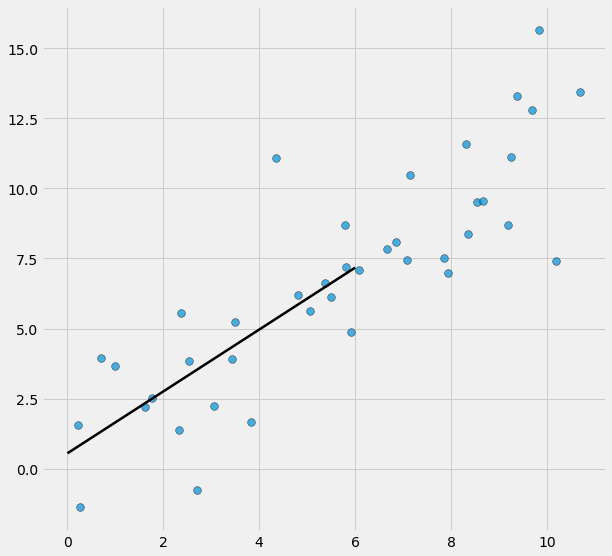

In [582]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)
print('intercept: ', a)
print('slope: ', b)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 6, num=1000)

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5);

intercept:  2.7836038483169423
slope:  0.09742747490107824


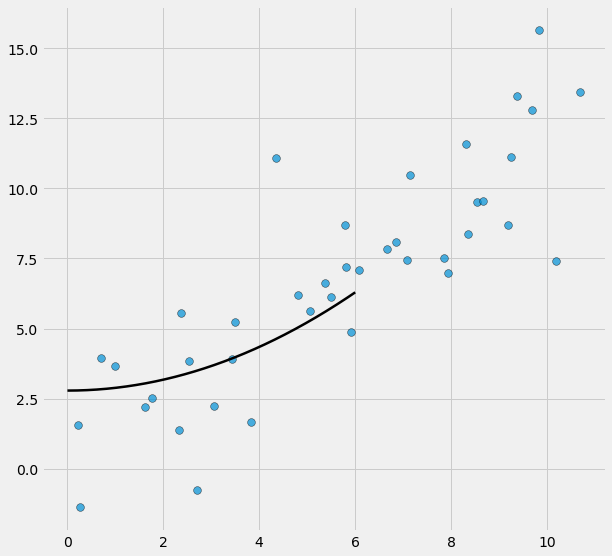

In [583]:
# Generate data
x = df.sqft
y = df.price

# Initialize layout
fig, ax = plt.subplots(figsize = (9, 9))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b_sqrt, a_sqrt = np.polyfit((x)**2, y, deg=1)
print('intercept: ', a_sqrt)
print('slope: ', b_sqrt)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 6, num=1000)

# Plot regression line
ax.plot(xseq, a_sqrt + b_sqrt * (xseq)**2, color="k", lw=2.5);

In [584]:
df['regressionLine'] = np.round(a + b * df['sqft'], 5)
df['regressionLineFlat'] = np.round(a_flat + b_flat * df['sqft'], 5)
df['regressionLineSqrt'] = np.round(a_sqrt + b_sqrt * (df['sqft'])**2, 5)
# df['x'] = np.linspace(0, 6, df.shape[0])

In [585]:
df['sqft'] = df.sqft.astype(np.float)

In [586]:
df.sort_values(by=['sqft', 'price'], inplace=True, ascending=True)
# df

In [587]:
df.to_json('scatterData2.json', orient='records')

# Gradients

In [588]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.001, iterations=10000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

m 1.189940571217833 b -0.06967709921919421


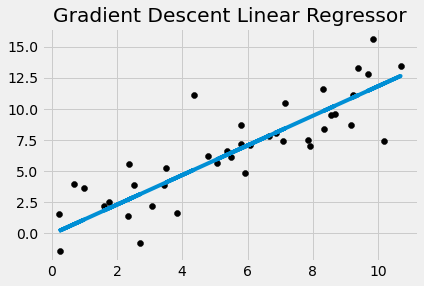

In [589]:
clf = GradientDescentLinearRegression()
clf.fit(sqft, prices)

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(sqft, prices, color='black')
plt.plot(sqft, clf.predict(sqft))
plt.gca().set_title("Gradient Descent Linear Regressor")
print('m', clf.m, 'b', clf.b)

In [590]:
gdWeight = 0
gdBias = 0
learning_rate = 0.01
N = df.shape[0]
iterations = 1000

In [591]:
# for _ in range(10):
#     for i in range(iterations):
#         biasDifference = df.price - gdWeight * df.sqft + gdBias
# #         print('biasDifference', biasDifference)
#         biasSum = np.sum(biasDifference)
# #         print('biasSum', biasSum)
#         b_gradient = (-2/N) * biasSum
# #         print('b_gradient', np.round(b_gradient, 3))
#         bias = gdBias + (learning_rate * b_gradient)
#         gdBias = np.round(bias, 3)
#         print('bias', gdBias)

In [592]:
for _ in range(1):
    for i in range(iterations):
        biasDifference = df.price - gdWeight * df.sqft + gdBias
        biasSum = np.sum(biasDifference)
        b_gradient = (-2/N) * biasSum
        bias = gdBias + (learning_rate * b_gradient)
        gdBias = np.round(bias, 3)
#         print('bias', gdBias)
        
        
        weightDifference = df.sqft * (df.price - (gdWeight * df.sqft + gdBias))
#         print('weightDifference', weightDifference)
        weightSum = np.sum(weightDifference)
#         print('weightSum', weightSum)
        w_gradient = (-2/N) * weightSum
#         print('w_gradient', np.round(w_gradient, 3))
        weight = gdWeight - (learning_rate * w_gradient)
        gdWeight = np.round(weight, 3)
print(gdWeight, gdBias)

1.192 -0.083


In [593]:
b_gradient = (-2/N) * biasSum
print(np.round(b_gradient, 3))

0.05


In [594]:
gdBias += learning_rate * b_gradient
print(gdBias)

-0.08250334246412871


# Sklearn Implementation

Coefficients: 
 [[1.10499754]] [0.54441662]
Mean squared error: 4.22
Coefficient of determination: 0.73


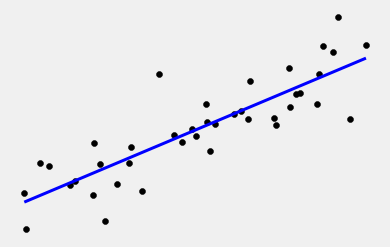

In [595]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X = df.sqft.values.reshape(-1, 1)
diabetes_y = df.price.values.reshape(-1,1)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X, diabetes_y)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X)

# The coefficients
print("Coefficients: \n", regr.coef_, regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X, diabetes_y, color="black")
plt.plot(diabetes_X, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [435]:
regr.intercept_

array([1.38350898])

In [597]:
m = 0
c = 0
learning_rate = 0.01
n = df.shape[0]
iterations = 1
np.random.seed(42)
for i in range(1000): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - learning_rate * D_m  # Update m
    c = c - learning_rate * D_c  # Update c
print(m, b)

1.105577362522706 1.1049975422309999


# New Datasets for Gradient Descent

1.000993562912867 1.1049975422309999
0.8545508623223932 1.1049975422309999
1.2133935974521888 1.1049975422309999
0.48112545087223524 1.1049975422309999
0.77678446704503 1.1049975422309999
0.6483656545107092 1.1049975422309999
-0.20978425770608125 1.1049975422309999
0.6904264890717592 1.1049975422309999
1.2906813816546399 1.1049975422309999
0.0093199530222614 1.1049975422309999
-0.7368495605594401 1.1049975422309999


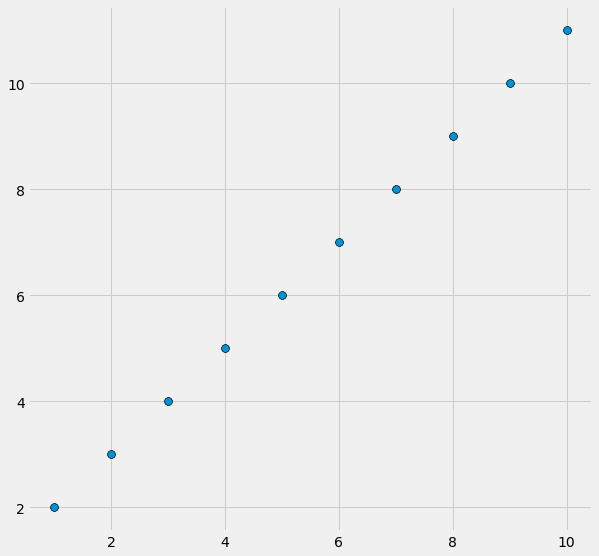

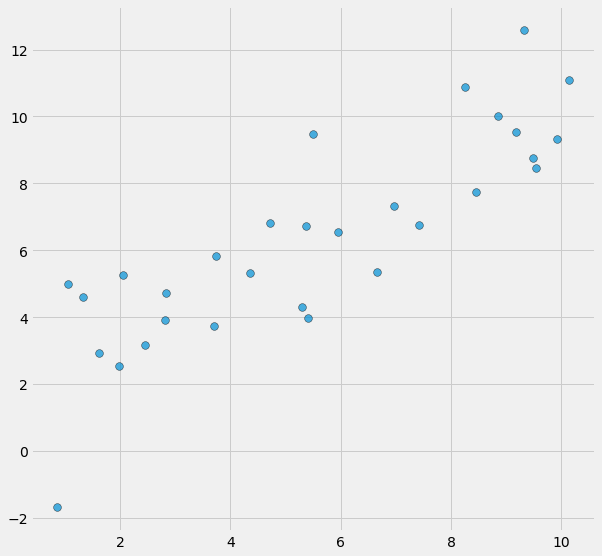

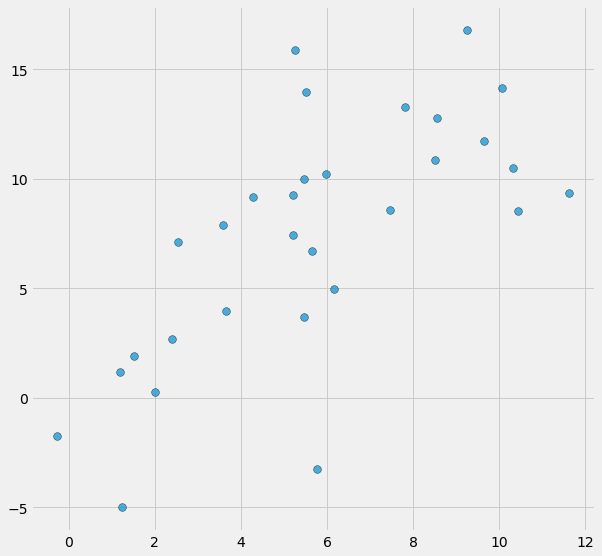

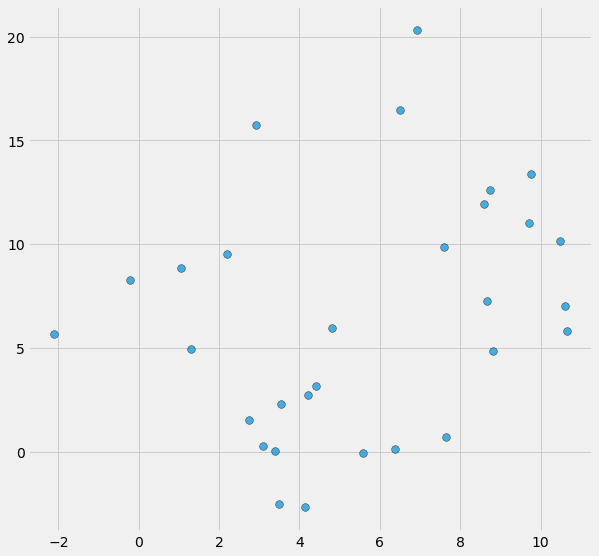

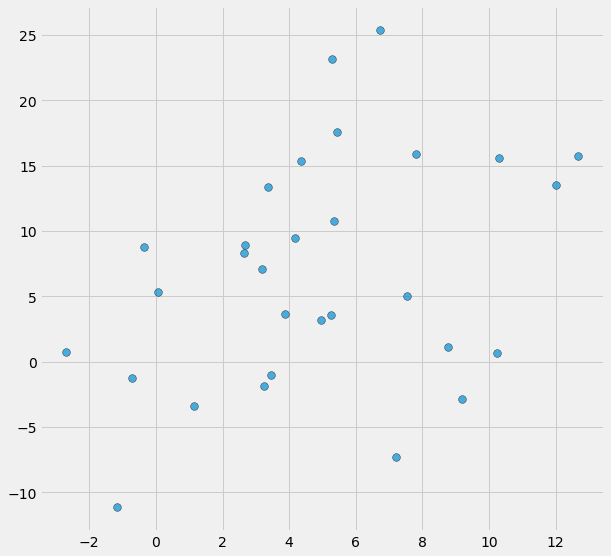

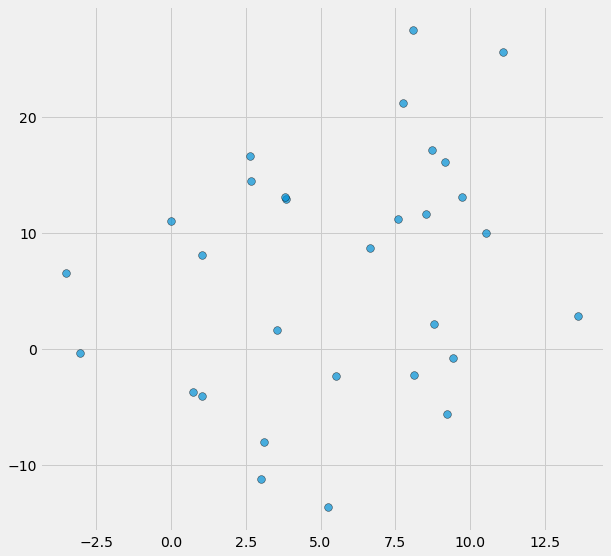

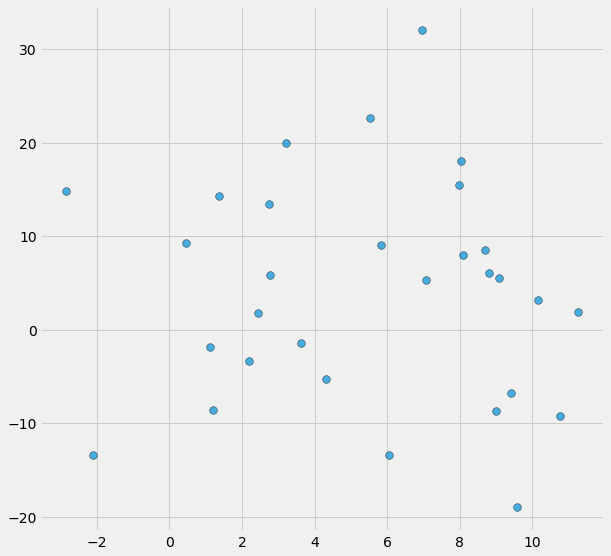

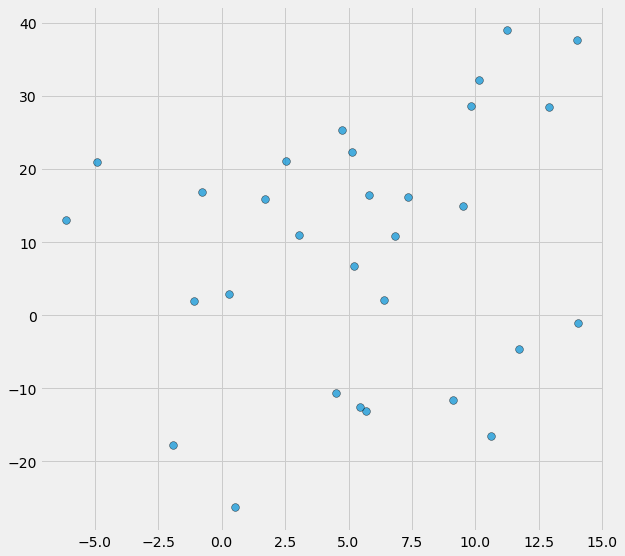

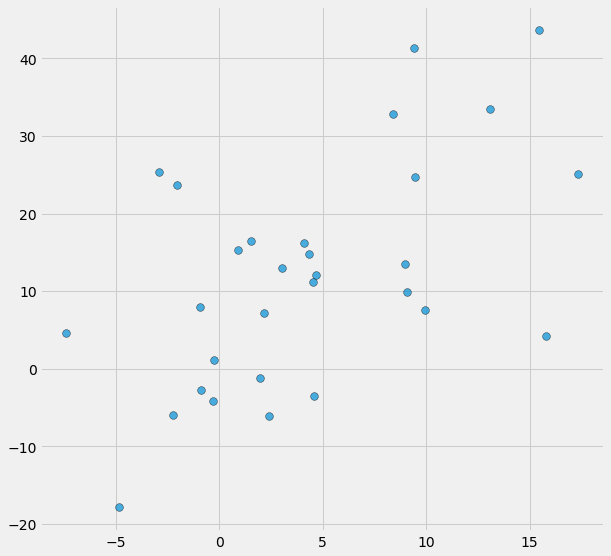

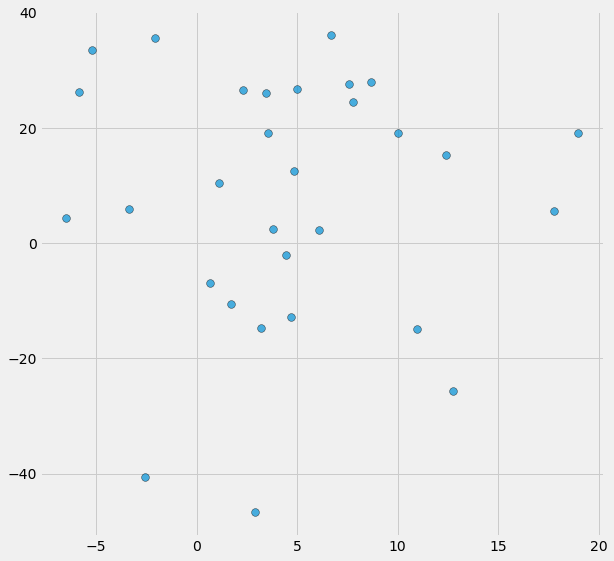

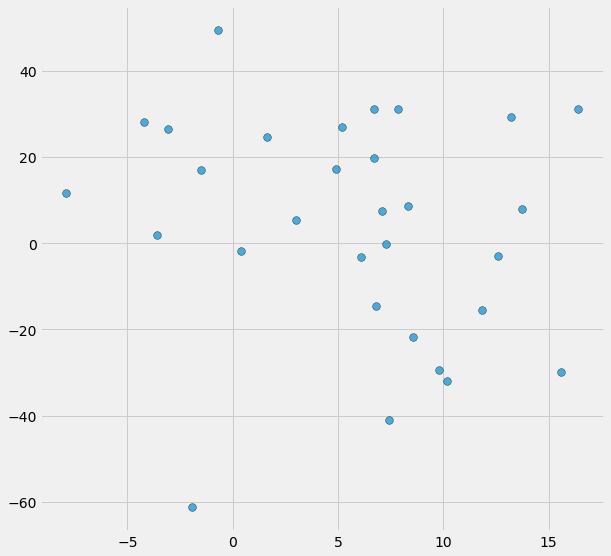

In [665]:
for data_index in range(0, 11):
    np.random.seed(50 + data_index)
    n = 30

    X = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=.5 * data_index)
    x = X
    y = np.array(sorted(list(range(10))*3)) + np.random.normal(size=n, scale=2.25 * data_index)

    x = X + 1
    y = y + 2
    if (data_index == 0):
        df = pd.DataFrame({'sqft': np.round(x, 3), 'price': np.round(y, 3)})
    df[f"sqft{data_index}"] = np.round(x, 3)
    df[f"price{data_index}"] = np.round(y, 3)

    # Initialize layout
    fig, ax = plt.subplots(figsize = (9, 9))

    # Add scatterplot
    ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")
    m = 0
    c = 0
    learning_rate = 0.01
    n = df.shape[0]
    iterations = 1
    np.random.seed(42)
    for i in range(1000): 
        Y_pred = m*X + c  # The current predicted value of Y
        D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
        D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
        m = m - learning_rate * D_m  # Update m
        c = c - learning_rate * D_c  # Update c
    print(m, b)
   

In [666]:
df

,sqft,price,sqft0,price0,sqft1,price1,sqft2,price2,sqft3,price3,...,sqft6,price6,sqft7,price7,sqft8,price8,sqft9,price9,sqft10,price10
0,1.0,2.0,1.0,2.0,0.855,-1.683,1.519,1.891,1.309,4.968,...,-2.113,-13.393,0.541,-26.309,-2.041,23.643,-6.512,4.322,-3.609,1.905
1,1.0,2.0,1.0,2.0,1.056,4.988,-0.269,-1.720,2.750,1.531,...,2.781,5.842,0.298,2.927,-7.406,4.660,3.534,19.111,-1.932,-61.298
2,1.0,2.0,1.0,2.0,1.625,2.939,1.240,-4.999,-2.109,5.674,...,4.308,-5.320,-4.915,21.019,-2.239,-6.001,2.892,-46.712,6.820,-14.623
3,2.0,3.0,2.0,3.0,1.320,4.615,1.196,1.192,1.051,8.844,...,0.463,9.258,-0.780,16.851,1.970,-1.135,-5.206,33.435,-4.209,28.187
4,2.0,3.0,2.0,3.0,2.050,5.255,2.017,0.260,3.496,-2.513,...,1.204,-8.633,7.348,16.186,-4.817,-17.851,4.846,12.534,-7.926,11.686
5,2.0,3.0,2.0,3.0,1.976,2.540,2.394,2.702,5.592,-0.075,...,-2.851,14.806,9.827,28.600,4.326,14.827,-3.364,5.920,8.534,-21.684
6,3.0,4.0,3.0,4.0,2.822,3.926,4.279,9.185,2.188,9.549,...,2.185,-3.347,-6.140,12.980,-0.877,-2.741,-2.558,-40.533,6.689,31.181
7,3.0,4.0,3.0,4.0,2.456,3.160,3.660,3.967,4.129,-2.684,...,5.837,8.995,5.681,-13.129,-2.924,25.310,10.975,-14.814,4.896,17.303
8,3.0,4.0,3.0,4.0,2.824,4.711,2.545,7.126,-0.226,8.288,...,1.119,-1.872,9.112,-11.573,0.907,15.352,-2.050,35.642,3.005,5.359
9,4.0,5.0,4.0,5.0,5.294,4.314,5.466,3.714,3.542,2.284,...,3.202,19.987,-1.912,-17.817,9.068,9.876,-5.876,26.148,-1.525,16.897


In [667]:
df.to_json('gradientDescentData2.json', orient='records')

In [660]:
df['sqft']

0      0.220
1      0.985
2      0.690
3      1.268
4      2.706
5      1.762
6      2.610
7      3.535
8      2.359
9      3.336
10     4.063
11     4.431
12     5.348
13     4.833
14     4.501
15     6.799
16     7.657
17     6.494
18     7.062
19     7.371
20     6.803
21     8.074
22     7.794
23     7.920
24     9.070
25     9.143
26     8.859
27    10.855
28     9.925
29    10.345
Name: sqft, dtype: float64